# Plotting challenge: plot the percentage of people that are fully vaccinated against COVID-19 per country (data from kaggle)

Data: https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv

In [1]:
# import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# path to data file (Excel / CSV format)
country_vaccinations="/Users/verenakutschera/Dropbox/Projects/Miscellanea/Workshops/meetup_Python_DataAnalysis/data/kaggle_covid_world_vaccination_progress_210210/country_vaccinations.xls"

In [3]:
# read in the file, create DataFrame
df = pd.read_csv(country_vaccinations)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [4]:
# Select rows with data from 8 February 2021
sel = df[df['date'] == '2021-02-08']
sel.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
51,Argentina,ARG,2021-02-08,511582.0,322318.0,189264.0,10430.0,19390.0,1.13,0.71,0.42,429.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
81,Austria,AUT,2021-02-08,283197.0,212062.0,71135.0,6337.0,11550.0,3.14,2.35,0.79,1282.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.data.gv.at/katalog/dataset/589132b...
129,Bahrain,BHR,2021-02-08,201116.0,201116.0,NaN,9710.0,4029.0,11.82,11.82,NaN,2368.0,"Pfizer/BioNTech, Sinopharm/Beijing",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1358883...
236,Brazil,BRA,2021-02-08,3605538.0,3579850.0,25688.0,51857.0,211604.0,1.70,1.68,0.01,996.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
278,Bulgaria,BGR,2021-02-08,58888.0,41407.0,17481.0,1850.0,2322.0,0.85,0.60,0.25,334.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://coronavirus.bg/bg/statistika


Text(0.5,1,'COVID-19 World Vaccination Progress (data entered for 8 February 2021)')

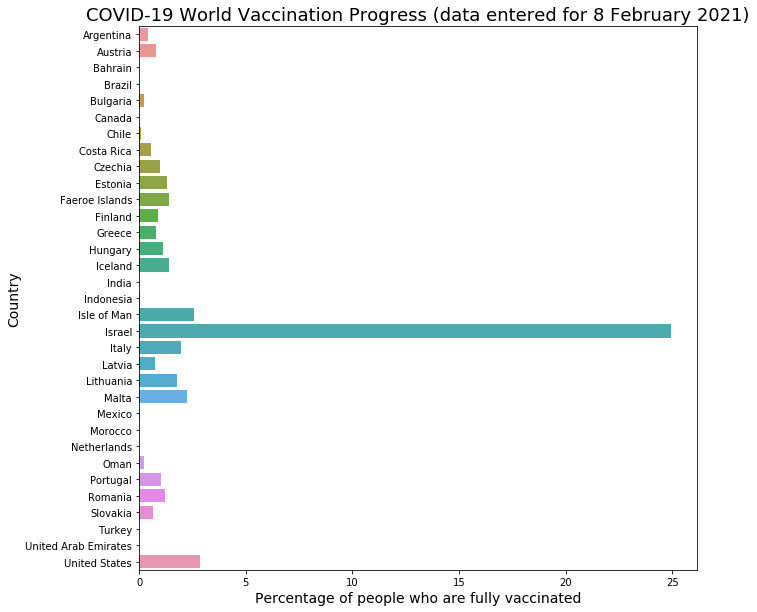

In [11]:
# Create a barplot with seaborn
fig, bar = plt.subplots(figsize = (10,10))
bar = sns.barplot(y='country', x='people_fully_vaccinated_per_hundred', data=sel)
bar.set_xlabel('Percentage of people who are fully vaccinated', fontsize = 14)
bar.set_ylabel('Country', fontsize = 14)
plt.title('COVID-19 World Vaccination Progress (data entered for 8 February 2021)', fontsize=18)

Note that this excludes all countries for which no data was entered on 8 February.

## Improvements

Get the values for the last entry per country to get the data as of 8 February for all countries in the dataset

In [14]:
import datetime

In [17]:
# convert the "date" column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [20]:
# group the dataframe on country and aggregate using idxmax to get the index of most recent date per group
idx = df.groupby('country')['date'].idxmax()
idx.head()

country
Algeria        1
Andorra        9
Argentina     51
Austria       81
Bahrain      129
Name: date, dtype: int64

In [21]:
# Use loc with this index to filter the required rows in the dataframe
df.loc[idx]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
9,Andorra,AND,2021-02-01,1036.0,1036.0,NaN,NaN,66.0,1.34,1.34,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
51,Argentina,ARG,2021-02-08,511582.0,322318.0,189264.0,10430.0,19390.0,1.13,0.71,0.42,429.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
81,Austria,AUT,2021-02-08,283197.0,212062.0,71135.0,6337.0,11550.0,3.14,2.35,0.79,1282.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.data.gv.at/katalog/dataset/589132b...
129,Bahrain,BHR,2021-02-08,201116.0,201116.0,NaN,9710.0,4029.0,11.82,11.82,NaN,2368.0,"Pfizer/BioNTech, Sinopharm/Beijing",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1358883...
142,Bangladesh,BGD,2021-02-07,31160.0,31160.0,NaN,NaN,3059.0,0.02,0.02,NaN,19.0,Oxford/AstraZeneca,Directorate General of Health Services,https://bdnews24.com/bangladesh/2021/02/08/ban...
184,Belgium,BEL,2021-02-07,421926.0,328623.0,93303.0,1986.0,14418.0,3.64,2.84,0.81,1244.0,"Moderna, Pfizer/BioNTech",Sciensano via covid-vaccinatie.be,https://covid-vaccinatie.be/en
205,Bermuda,BMU,2021-01-30,4897.0,NaN,NaN,NaN,281.0,7.86,NaN,NaN,4512.0,Pfizer/BioNTech,Government of Bermuda,https://www.gov.bm/sites/default/files/COVID-1...
212,Bolivia,BOL,2021-02-03,3560.0,NaN,NaN,1967.0,593.0,0.03,NaN,NaN,51.0,Sputnik V,Ministry of Health,https://boliviasegura.gob.bo/noticias/
236,Brazil,BRA,2021-02-08,3605538.0,3579850.0,25688.0,51857.0,211604.0,1.70,1.68,0.01,996.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/


In [ ]:
# Create a barplot with seaborn
fig, bar = plt.subplots(figsize = (10,10))
bar = sns.barplot(y='country', x='people_fully_vaccinated_per_hundred', data=df)
bar.set_xlabel('Percentage of people who are fully vaccinated', fontsize = 14)
bar.set_ylabel('Country', fontsize = 14)
plt.title('COVID-19 World Vaccination Progress (data entered for 8 February 2021)', fontsize=18)